### 경희대학교 산업경영공학과 2015100915 김태호

# 경희대학교 공과대학 시간표 분석

BeautifulSoup와 urllib, selenium을 사용하여 수강목록의 데이터가 있는  '에브리타임'에서 데이터를 가져와서 분석해본다.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
from selenium import webdriver
import urllib.request
import urllib.parse
import time
import re #정규식

In [2]:
url = 'https://everytime.kr/timetable'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)

In [ ]:
user_id = input('에브리타임 아이디를 입력해주세요.: ')
et_login = driver.find_element_by_name("userid")
et_login.clear()
et_login.send_keys(user_id) #자신의 아이디를 넣으세요

user_pw = input('에브리타임 비밀번호를 입력해주세요.: ')
et_login = driver.find_element_by_name("password")
et_login.clear()
et_login.send_keys(user_pw) #자신의 비번을 넣으세요

driver.find_element_by_xpath("""//*[@id="container"]/form/p[3]/input""").click()
time.sleep(5)

In [4]:
while True:
    try: # 처음나오는 팝업창 닫기
        driver.find_element_by_xpath("""//*[@id="sheet"]/ul/li[3]/a""").click()
        time.sleep(2)
        break
    except:
        continue
while True:
    try: # 아래에 강좌목록 창 띄우기
        driver.find_element_by_xpath("""//*[@id="container"]/ul/li[1]""").click()
        time.sleep(2)
        break
    except:
        continue
for i in range(9):
    while True:
        try: # 전공선택버튼 누르기
            driver.find_element_by_xpath("""//*[@id="subjects"]/div[1]/a[4]""").click()
            time.sleep(2)
            break
        except:
            continue
    while i == 0:
        try: # 공과대학 선택하기
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/li[2]""").click()
            time.sleep(2)
            break
        except:
            continue
    while True:
        try: # 과 선택하기
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/ul[2]/li["""+str((i+1))+"""]""").click()
            time.sleep(2)
            break
        except:
            continue
    while True:
        try: # 한번더 누르기
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/ul[2]/ul["""+str((i+1))+"""]/li""").click()
            time.sleep(2)
            break
        except:
            continue

In [5]:
page = driver.page_source # beautifulsoup 로 받아오기
soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   에브리타임
  </title>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="258676027581965" property="fb:app_id"/>
  <meta content="website" property="og:type"/>
  <meta content="https://everytime.kr/images/og_image.png" property="og:image"/>
  <meta content="https://everytime.kr/timetable" property="og:url"/>
  <meta content="에브리타임" property="og:site_name"/>
  <meta content="에브리타임" property="og:title"/>
  <meta content="전국 400개 대학을 지원하는 대학교 커뮤니티 및 시간표 서비스. 시간표 작성 및 학업 관리, 학교 생활 정보, 학교별 익명 커뮤니티 기능을 제공합니다." property="og:description"/>
  <meta content="전국 400개 대학을 지원하는 대학교 커뮤니티 및 시간표 서비스. 시간표 작성 및 학업 관리, 학교 생활 정보, 학교별 익명 커뮤니티 기능을 제공합니다." name="description"/>
  <meta content="에브리타임, 에타, everytime, 시간표, 수강신청, 강의평가, 학점계산기, 학식, 오늘의학식, 책방, 중고책, 대학생, 대학교, 대학, 대학생 시간표, 대학교 시간표, 대학생 커뮤니티, 대학교 커뮤니티, 시간표 앱, 시간표 어플" name="key

In [6]:
contents = []
tmp = soup.find('div','list').find('tbody').find_all('td') # 강좌목록 창에서 내용가져오기
for i in tmp:
    tmp = i.get_text()
    contents.append(tmp)
contents = np.array(contents) # 가져온 리스트 array형태로 만들기(dataframe으로 만들기위해)
contents

array(['조회', '3', 'ENV385-00', '대기오염공정실험및설계', '김동술', '3',
       '화 15:00-19:50 (공102-1)', '04', '', '21', '24',
       '2016학년도 교육과정 변경으로 인해 강의학기 1학기로 변경', '조회', '3', 'ENV385-01',
       '대기오염공정실험및설계', '김동술', '3', '목 15:00-19:50 (공102-1)', '04', '',
       '12', '24', '', '조회', '4', 'ENV488-01', '신재생에너지실험및설계', '황선진', '3',
       '수 16:30-21:20 (공369)', '04', '', '20', '20', '', '조회', '4',
       'ENV488-02', '신재생에너지실험및설계', '민부기', '3', '화 15:00-19:50 (공263)',
       '04', '', '9', '20', '', '조회', '4', 'ENV487-00',
       '졸업논문(환경학및환경공학전공)', '유가영', '0', '토 09:00- ()', '04', '', '0', '45',
       '당해 졸업예정자 학생들만 필히 수강신청 요망', '조회', '4', 'ENV496-01', '환경종합설계1',
       '오종민', '3', '월 15:00-17:45 (공369)', '04', '', '27', '0', '', '조회',
       '3', 'ENV390-00', '물리화학적수처리', '민부기', '3',
       '목 13:30-14:45 (공369)화 13:30-14:45 (공369)', '05', '', '25', '40',
       '', '조회', '3', 'ENV315-00', '수계환경복원설계', '정경진', '3',
       '수 13:30-14:45 (공369)월 13:30-14:45 (공369)', '05', '', '30', '40',
       

In [7]:
column = []
tmp = tmp = soup.find('div','list').find('thead').find_all('th') #column에 들어갈 내용 가져오기
for i in tmp:
    tmp = str(i).lstrip('<th>').split('<div>')
    column.append(tmp[0])
column

['계획서',
 '대상학년',
 '강좌코드',
 '강좌명',
 '교수명',
 '학점',
 '강의시간/강의실',
 '이수구분',
 '강의평',
 '담은 인원',
 '정원',
 '특이사항']

In [8]:
timetable = pd.DataFrame(contents.reshape(len(contents)//12,12), columns=column) # Dataframe으로 만들기
del(timetable['계획서']) ;del(timetable['강의평']) # 필요없는 column 지우기
timetable

,대상학년,강좌코드,강좌명,교수명,학점,강의시간/강의실,이수구분,담은 인원,정원,특이사항
0,3,ENV385-00,대기오염공정실험및설계,김동술,3,화 15:00-19:50 (공102-1),04,21,24,2016학년도 교육과정 변경으로 인해 강의학기 1학기로 변경
1,3,ENV385-01,대기오염공정실험및설계,김동술,3,목 15:00-19:50 (공102-1),04,12,24,
2,4,ENV488-01,신재생에너지실험및설계,황선진,3,수 16:30-21:20 (공369),04,20,20,
3,4,ENV488-02,신재생에너지실험및설계,민부기,3,화 15:00-19:50 (공263),04,9,20,
4,4,ENV487-00,졸업논문(환경학및환경공학전공),유가영,0,토 09:00- (),04,0,45,당해 졸업예정자 학생들만 필히 수강신청 요망
5,4,ENV496-01,환경종합설계1,오종민,3,월 15:00-17:45 (공369),04,27,0,
6,3,ENV390-00,물리화학적수처리,민부기,3,목 13:30-14:45 (공369)화 13:30-14:45 (공369),05,25,40,
7,3,ENV315-00,수계환경복원설계,정경진,3,수 13:30-14:45 (공369)월 13:30-14:45 (공369),05,30,40,
8,2,ENV281-00,수질오염학,정경진,3,월 10:30-11:45 (공369)수 10:30-11:45 (공369),05,37,40,
9,3,ENV391-00,에어로졸제어,김동술,3,수 10:30-11:45 (공102-1)월 10:30-11:45 (공102-1),05,28,45,


In [9]:
major = soup.find('a','item active').get_text().split(':')[1]
driver.close()
major

'환경학및환경공학과'

In [10]:
graph = {}
graph[str(major)] = len(timetable)
graph

{'환경학및환경공학과': 22}

In [11]:
timetable.to_excel('../data_1/19년 1학기 '+major+' 강좌.xls',encoding = 'utf8',sheet_name=major,index = False)#가공한 데이터를 csv형태로 저장함

In [12]:
timetable = pd.read_excel('../data_1/19년 1학기 '+major+' 강좌.xls',encoding = 'utf8') 
timetable

,대상학년,강좌코드,강좌명,교수명,학점,강의시간/강의실,이수구분,담은 인원,정원,특이사항
0,3.0,ENV385-00,대기오염공정실험및설계,김동술,3,화 15:00-19:50 (공102-1),4,21,24,2016학년도 교육과정 변경으로 인해 강의학기 1학기로 변경
1,3.0,ENV385-01,대기오염공정실험및설계,김동술,3,목 15:00-19:50 (공102-1),4,12,24,NaN
2,4.0,ENV488-01,신재생에너지실험및설계,황선진,3,수 16:30-21:20 (공369),4,20,20,NaN
3,4.0,ENV488-02,신재생에너지실험및설계,민부기,3,화 15:00-19:50 (공263),4,9,20,NaN
4,4.0,ENV487-00,졸업논문(환경학및환경공학전공),유가영,0,토 09:00- (),4,0,45,당해 졸업예정자 학생들만 필히 수강신청 요망
5,4.0,ENV496-01,환경종합설계1,오종민,3,월 15:00-17:45 (공369),4,27,0,NaN
6,3.0,ENV390-00,물리화학적수처리,민부기,3,목 13:30-14:45 (공369)화 13:30-14:45 (공369),5,25,40,NaN
7,3.0,ENV315-00,수계환경복원설계,정경진,3,수 13:30-14:45 (공369)월 13:30-14:45 (공369),5,30,40,NaN
8,2.0,ENV281-00,수질오염학,정경진,3,월 10:30-11:45 (공369)수 10:30-11:45 (공369),5,37,40,NaN
9,3.0,ENV391-00,에어로졸제어,김동술,3,수 10:30-11:45 (공102-1)월 10:30-11:45 (공102-1),5,28,45,NaN


### 자동으로 공대 강좌목록 가져오기

In [ ]:
url = 'https://everytime.kr/timetable'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)
time.sleep(3)
user_id = input('에브리타임 아이디를 입력해주세요.: ')
et_login = driver.find_element_by_name("userid")
et_login.clear()
et_login.send_keys(user_id)

user_pw = input('에브리타임 비밀번호를 입력해주세요.: ')
et_login = driver.find_element_by_name("password")
et_login.clear()
et_login.send_keys(user_pw) #자신의 비번을 넣으세요

driver.find_element_by_xpath("""//*[@id="container"]/form/p[3]/input""").click()
time.sleep(3)
while True:
    try:
        driver.find_element_by_xpath("""//*[@id="sheet"]/ul/li[3]/a""").click()
        time.sleep(2)
        break
    except:
        continue
timetable_all = pd.DataFrame()
timetable_all
graph = {}
while True:
    try:
        driver.find_element_by_xpath("""//*[@id="container"]/ul/li[1]""").click()
        time.sleep(2)
        break
    except:
        continue
for i in range(9):
    while True:
        try:
            driver.find_element_by_xpath("""//*[@id="subjects"]/div[1]/a[4]""").click()
            time.sleep(2)
            break
        except:
            continue
    while i == 0:
        try:
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/li[2]""").click()
            time.sleep(2)
            break
        except:
            continue
    while True:
        try:
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/ul[2]/li["""+str((i+1))+"""]""").click()
            time.sleep(2)
            break
        except:
            continue
    while True:
        try:
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/ul[2]/ul["""+str((i+1))+"""]/li""").click()
            time.sleep(2)
            break
        except:
            continue
    page = driver.page_source
    soup = BeautifulSoup(page, "html.parser")
    contents = []
    tmp = soup.find('div','list').find('tbody').find_all('td')
    for i in tmp:
        tmp = i.get_text()
        contents.append(tmp)
    contents = np.array(contents)
    column = []
    tmp = tmp = soup.find('div','list').find('thead').find_all('th')
    for i in tmp:
        tmp = str(i).lstrip('<th>').split('<div>')
        column.append(tmp[0])
    timetable = pd.DataFrame(contents.reshape(len(contents)//12,12), columns=column)
    del(timetable['계획서']) ;del(timetable['강의평'])
    major = soup.find('a','item active').get_text().split(':')[1]
    graph[str(major)] = len(timetable)
    timetable_all = pd.concat([timetable_all,timetable],ignore_index=True)
    timetable.to_excel('../data/19년 1학기 '+major+' 강좌.xls',encoding = 'utf8',sheet_name=major,index = False)
timetable_all.to_excel('../data/19년 1학기 공과대학 강좌.xls',encoding = 'utf8',sheet_name=major,index = False)
time.sleep(2)
driver.close()

In [14]:
timetable = pd.read_excel('../data/19년 1학기 산업경영공학과 강좌.xls', encoding = 'utf8') 
timetable

,대상학년,강좌코드,강좌명,교수명,학점,강의시간/강의실,이수구분,담은 인원,정원,특이사항
0,3,IE301-01,경영과학1,박명주,3,수 10:30-11:45 (공469)월 10:30-11:45 (공469),04,30,30,NaN
1,3,IE301-02,경영과학1,박명주,3,월 13:30-14:45 (공148)수 13:30-14:45 (공148),04/05,62,60,NaN
2,4,IE400-00,졸업논문(산업경영공학),박명주,0,토 09:00-11:50 (공148),04,25,50,"졸업예정자 필히 수강신청 요망, 창의적종합설계와 함께 수강 요망"
3,4,IE423-01,창의적종합설계1(산업경영공학),진창호,3,화 10:30-11:45 (공148)목 10:30-11:45 (공148),04,22,17,NaN
4,4,IE423-02,창의적종합설계1(산업경영공학),정재윤,3,화 10:30-11:45 (공469)목 10:30-11:45 (공469),04,7,20,NaN
5,4,IE423-03,창의적종합설계1(산업경영공학),박명주,3,화 13:30-14:45 (공469)목 13:30-14:45 (공469),04,12,15,NaN
6,4,IE410-00,CAD/CAM,엄주명,3,월 09:00-10:15 (공127)수 09:00-10:15 (공127),05,36,30,NaN
7,4,IE402-00,경영전략론,김상국,3,수 10:30-11:45 (공148)월 10:30-11:45 (공148),05,29,60,NaN
8,2,IE201-00,경제성공학,김장호,3,화 13:30-14:45 (공148)목 13:30-14:45 (공148),05,95,65,NaN
9,4,IE414-00,금융공학,김장호,3,목 15:00-16:15 (공148)화 15:00-16:15 (공148),05,34,65,NaN


In [15]:
timetable_all = pd.read_excel('../data/19년 1학기 공과대학 강좌.xls',encoding = 'utf8') 
timetable_all

,대상학년,강좌코드,강좌명,교수명,학점,강의시간/강의실,이수구분,담은 인원,정원,특이사항
0,4.0,AE473-00,건축공학응용설계,한충희,3,월 18:00-20:45 (공263),04,9,18,NaN
1,4.0,AE473-01,건축공학응용설계,김희철,3,월 18:00-20:45 (공149),04,19,18,NaN
2,4.0,AE473-02,건축공학응용설계,윤근영,3,월 18:00-20:45 (공B105),04,18,18,NaN
3,4.0,AE473-03,건축공학응용설계,원서경,3,월 18:00-20:45 (공B102),04,12,15,NaN
4,3.0,AE351-00,건축구조해석,이영학,3,수 13:30-14:45 (공B103)월 13:30-14:45 (공B103),04,31,36,NaN
5,3.0,AE351-01,건축구조해석,이영학,3,월 15:00-16:15 (공B103)수 15:00-16:15 (공B103),04,26,36,NaN
6,3.0,AE371-00,건축설비I,미정,3,화 09:00-11:45 (공149),04,54,55,NaN
7,3.0,AE331-00,건축시공및재료I,미정,3,금 15:00-17:45 (공B103),04,50,60,NaN
8,2.0,AE211-00,기초건축공학설계,김정태,3,월 15:00-17:45 (글로벌508),04,30,30,NaN
9,2.0,AE211-03,기초건축공학설계,민준기,3,월 15:00-17:45 (멀B205),04,41,30,NaN


In [16]:
maj = list(graph.keys())
num = list(graph.values())
graph_df = {'major':maj, 'num':num}
graph_df = pd.DataFrame(graph_df)
graph_df = graph_df.set_index('major')
graph_df

,num
major,
건축공학과,28
기계공학과,50
원자력공학과,22
사회기반시스템공학과,26
화학공학과,36
건축학과,42
산업경영공학과,27
정보전자신소재공학과,31
환경학및환경공학과,22


Text(0.5,0,'num')

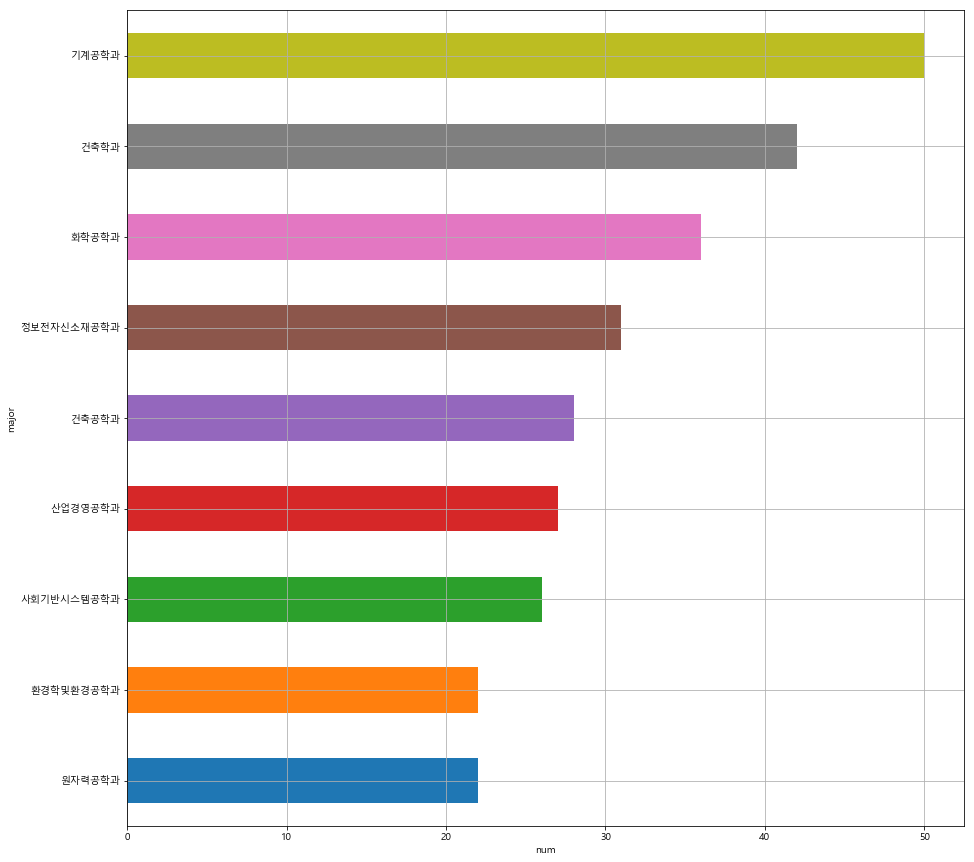

In [17]:
plt.figure()
graph_df.sort_values(by=['num'])['num'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('num')